Import the necessary libraries. Import the magnetic fields and all the predefined functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from scipy import special, optimize, integrate, interpolate
#from scipy import special, math, optimize, integrate, interpolate
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import copy
import time
import random
import pandas as pd
import math
import uuid
from scipy.interpolate import interp1d
from numpy import linalg
import matplotlib.patheffects as mpe
#%matplotlib inline

# Some warnings show up during the resolution of ODEs, but aren't important to the analysis.
import warnings
warnings.filterwarnings('ignore')

# The magnetic fields are in a separate file.
from mag_field_GH import Bz, Btheta, dBz, dBtheta
from mag_field_Teresa import TBz, TBtheta, TdBz, TdBtheta
from mag_field_L import LBz, LBtheta, LdBz, LdBtheta

from auxiliaryfunctions import F, f, df, g, F_euler, bound_cond_D, TF, Tf, Tdf, Tg, TF_euler, Tbound_cond_D, LF, Lf, Ldf, Lg, LF_euler, Lbound_cond_D
from dispersionfunction import disp_F, Tdisp_F, Ldisp_F, model_dispF_comparison, model_dispF_3comparison, plot_dispersion_function, Tplot_dispersion_function, Lplot_dispersion_function, plot_dispersion_functions, Tplot_dispersion_functions, Lplot_dispersion_functions
from dispersionrelation import biggest_root, dispersion_relation, Tdispersion_relation, Ldispersion_relation, compare_dispersion_relation, Tcompare_dispersion_relation, Lcompare_dispersion_relation
from maxgrowth import lambdamax, Tlambdamax, Llambdamax, get_k_vals, max_growth_plot, Tmax_growth_plot
from thresholdfinder import critical_q, Tcritical_Cnm, obtain_taus, obtain_taus1, obtain_taus2, obtain_taus3, obtain_alphas, obtain_alphas2, comparison_lineplot
from lorentzVStwist import line_colorplot, Lorentz, Twist, avg
from modelcomparison import Teresa_to_GH, Teresa_to_GH_bis, GH_to_Teresa, model_comparison, model_comparison_bis, compare_change_of_model, plot_lim_Teresa, Teresa_to_Teresa

plt.rcParams['text.usetex'] = True
# plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (8, 6)
def set_basics(title, axes, markzero = False):
    fig, ax = plt.subplots()
    plt.title(title)
    if markzero:
        plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    ax.set_xlabel(axes[0])
    ax.set_ylabel(axes[1])
    ax.legend(loc='best')
    return fig, ax

# NOTE: Any plot can be saved by using plt.savefig.
# dpi = 1200 corresponds to extremely high resolution.
# Example:
# plt.savefig(str(uuid.uuid4())+'.png', format="png", dpi=1200)

In [7]:
# PARAMETERS (normalized; don't change)
n_ite = 250
y0 = [1, 0] # Initial condition for Euler-Lagrange
R = 1
R0, Rf = 1e-3*R, (1-1e-3)*R
m = 1

How to evaluate the dispersion function D(l;k), given (alpha,q), (m,k) a value l for lambda.
In this case, we also choose to plot
For given paramters, plots the perturbation on r (normalized) and computes the value of the dispersion function


For the CC model:
(n,m) = (1, 1), Cnm = 1.7, tau = 1.1
lambda = 0.00529, k = -3
Dispersion function =  1445.8626251802823
xi(R)= 537.4970762582391, xi'(R)= 159.17371805896352

For the GH model:
q = 0.0, alpha = 1.1
lambda = 0.00529, k = -3
Dispersion function =  236.78711328677986
xi(R)= 7.106754583141716, xi'(R)= 19.175857896994383

For the CC model:
(n,m) = (1, 1), Cnm = 1.5, tau = 4
lambda = 1e-07, k = -3
Dispersion function =  201.35159983535974
xi(R)= 9.969896434065479, xi'(R)= 34.18825371046178

For the GH model:
q = 0.7, alpha = 3
lambda = 1e-07, k = 1e-07
Dispersion function =  1.8947630714683812
xi(R)= 3.1015011042080594, xi'(R)= 11.583944463345635

For the L model:
alpha = 3
lambda = 1e-07, k = 1e-07
Dispersion function =  10.059070334165508
xi(R)= 0.6024902156574804, xi'(R)= -0.9257191475498544


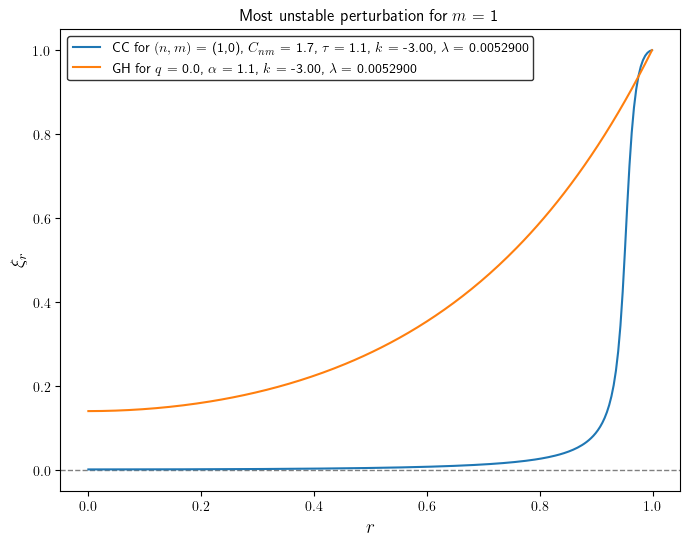

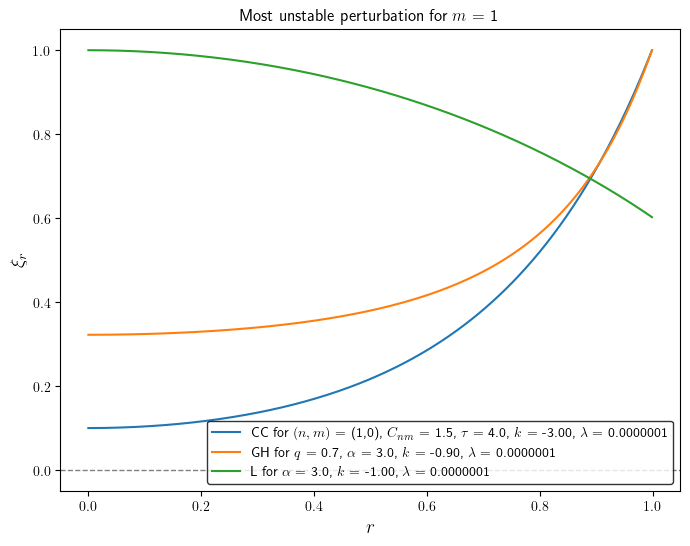

In [8]:
alpha = 1.1; q = 0.
m = 1
n = 1; mm = 0; Cnm = 1.7; tau = 1.1

k = -3
l = 5.29e-3
model_dispF_comparison(l, l, n, mm, m, k, k, Cnm, tau, q, alpha, info = True)
model_dispF_3comparison([1e-7,1e-7,1e-7], 1, 0, 1, [-3,-0.9,-1], 1.5, 4, 0.7, 3, 3, info = True)
#print('Dispersion function = ', Tdisp_F(l, n, mm, m, k, Cnm, tau, printsol = True))
#print('Dispersion function = ', disp_F(l, m, k, q, alpha, printsol = True))

Plots the dispersive funcion for a given set of parameters

In [9]:
m = 1
[alpha, q] = [1.2, 1.2]
k = -0.99
[lmax, lmin] = [-5, -7]
lambdas = 10**np.linspace(lmin,lmax,100)
plot_dispersion_function(alpha, q, m, k, lambdas, normalized = False)

KeyboardInterrupt: 

Plots the dispersive function for diferent values of k

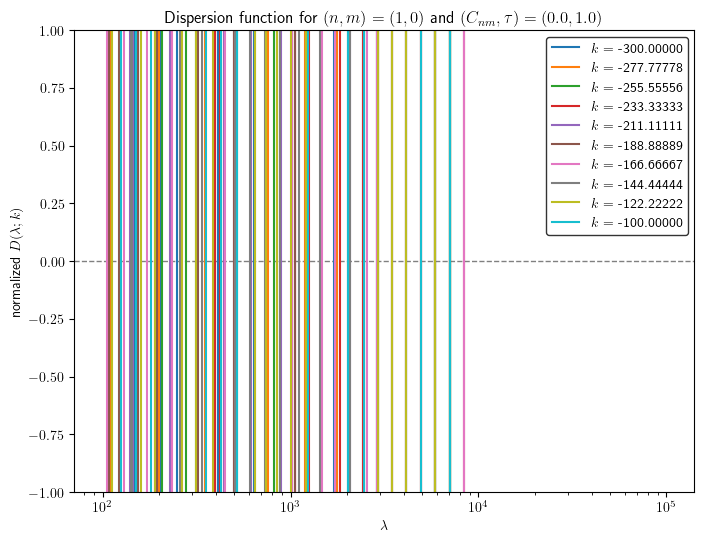

In [ ]:
# For the CC model
posy = 2.73
posx = 1.27e-7

m = 1
#tau=1.1; Cnm=1.2; ks = np.linspace(-3.53,-3.6,10); lambdas = np.linspace(3.7e-4,3.76e-4,300)
#tau=1.2; Cnm=1.2; ks = np.linspace(-3.33,-3.38/q,10); lambdas = np.linspace(3e-5,3.05e-5,300)
#tau = 1.3; Cnm = 1.2; ks = np.linspace(-2.77,-2.73,10); lambdas = np.linspace(3e-7,5e-7,100)
[tau, Cnm] = [1, 0.01]
ks = np.linspace(-300,-100,10)
lambdas = 10**np.linspace(2,5,40)
[n, mm] = [1,0]
Tplot_dispersion_functions(n, mm, Cnm, tau, m, ks, lambdas, posx, posy)
#[alpha, q] = [4, 0.8]
#ks = np.linspace(-1.01,-0.97,10) # Multiples of q
#lambdas = 10**np.linspace(-13,-5,100)
#plot_dispersion_functions(alpha, q, m, ks, lambdas, posx, posy)

In [ ]:
# For the L model
posy = 1.73; posx = 0.02

m = 1
ks = np.linspace(0.11,0.13,5)
ls = 10**np.linspace(-1.7,-1.6,100)
alpha = 0.5
#Lplot_dispersion_functions(alpha, m, ks, ls, posx, posy)
Lcompare_dispersion_relation([0.3, 0.5, 0.7], l_vals = [-1,-10], n_k = 60, n_l = 20)

Finds the dispersion relation for several magnetic field configurations, and plots them in the same figure.

In [ ]:

# "l_vals" is the range of exponents in base 10 for lambda which is being considered to look for a solution.
# "n_k" and "n_l" can be modified to change on the degree of accuracy.
parameters = [[5, 0.4], [5, 0.45], [5, 0.5], [5, 0.55]]  #[[1.2,1.2], [1.23,1.23], [1.2,1.23], [1.23,1.2], [1.27,1.2], [1.2,1.27]] #[tau, Cnm]
[n, mm] = [1, 1]
Tcompare_dispersion_relation(n, mm, parameters, l_vals = [-13,-4], n_k = 100, n_l = 20)
#parameters = [[1.2,0.7], [1.7,0.7], [2.4,0.7], [3.5,0.8], [4,0.8]] #[alpha, q]
#compare_dispersion_relation(parameters, l_vals = [-9,-3], n_k = 60, n_l = 20)

Finds lambda max for different parameters in GH

In [ ]:
### Finds lambda max for different parameters in GH
#alpha = 1; l_vals = [-9,-3]
alpha = 1.3; l_vals = [-14,3]
#alpha = 1.5; l_vals = [-12,-3]

m = 1
alphas = np.linspace(1, 6, 20)
qs = np.linspace(0.01, 1, 20)

n_k = 50
n_l = 20
lambdamaxs = []
ks = []
for alpha in alphas:
    this_curve = []
    this_ks = []
    print('Obtaining values for alpha =', alpha)
    for q in qs:
        k_vals = get_k_vals(m, q)
        [l,k] = lambdamax(alpha, q, m, k_vals, n_k, l_vals, n_l)
        this_curve.append(l)
        this_ks.append(k)
        print(r'For q = ' + str(np.round(q,3)) + ', lambda = ' + str(l) + ', k = ' + str(k))
    print('')
    lambdamaxs.append(this_curve)
    ks.append(this_ks)
    
# Save as csv
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', lambdamaxs, delimiter=',')

Finds lambda max for different parameters in CC

In [ ]:
### Finds lambda max for different parameters in CC
l_vals = [-2,12]
parameters = [[1.1, -7], [1.2, -4], [1.3, -3], [1.4, -2], [1.5, -2], [2, -1], [3, -1], [4, -1], [5, -1]]#[1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]
taus = np.linspace(1.01,5,30)
#k = -7 #starting with tau = 1.1, Cnm = 1.5/tau
#k = -4 #starting with tau = 1.2, Cnm = 1.5/tau
m = 1
[n, mm] = [1, 0]
n_k = 100
n_l = 30
lambdamaxs = []
ks = []
taus = [2]
#for p in parameters:
for tau in taus:
    k = -30
    #tau = p[0]
    #k = p[1]
    Cnms = np.linspace(0.01,1.6,30)#np.linspace(1.5/tau, 1.5/tau + 0.2, 3)
    Cnms = [0.5]
    this_curve = []
    this_ks = []
    print(r'Obtaining curve for $\tau$ =', tau)
    for Cnm in Cnms:
        k_vals = [-3,-2]
        [l, k] = Tlambdamax(n, mm, Cnm, tau, m, k_vals, n_k, l_vals, n_l)
        this_curve.append(l)
        this_ks.append(k)
        print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(l) + ', k = ' + str(k))
    print('')
    lambdamaxs.append(this_curve)
    ks.append(this_ks)
  
# Save as csv
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', lambdamaxs, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', ks, delimiter=',')

In [ ]:
datay = np.loadtxt('sheet_lambdamax_CC1.1.csv', delimiter=',')[:-5]
datay = datay[2:]
datax = np.linspace(0.01,2,30)[:-5]
datax = datax[2:]
plt.plot(datax,datay)
plt.yscale('log')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

[n,mm] = [1,0]
[tau, Cnm] = [1.1,0.5]
m = 1
k_vals = [-40,-2]
n_k = 50
l_vals = [-8,2]
n_l = 15
[l, k] = Tlambdamax(n, mm, Cnm, tau, m, k_vals, n_k, l_vals, n_l)
print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(l) + ', k = ' + str(k))

#For Cnm = 0.35, lambda = 3.727593720314938, k = -696.9387755102041
#For Cnm = 0.338, lambda = 4.070725018555173, k = -32.85714285714286

l0 = 1
[Cnmmin,Cnmmax] = [Cnm-0.05,Cnm+0.05]
[Cnm,k] = Tcritical_Cnm(n, mm, m, tau, l0, Cnmmin, Cnmmax, k, tol = 0.001, n_k = 40, n_l = 20)
[l, k] = Tlambdamax(n, mm, Cnm, tau, m, k_vals, n_k, l_vals, n_l)
print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(l) + ', k = ' + str(k))

For Cnm = 0.5, lambda = 1.0134763764839803, k = -10.53061224489796
For Cnm = 0.485, lambda = 1.2214587906707584, k = -12.857142857142858


In [ ]:
import warnings
warnings.filterwarnings('ignore')

[n,mm] = [1,0]

tau = 5
Cnms = np.linspace(0,0.5,10)
k_vals = [-7,-0.4]

tau = 4
Cnms = np.linspace(0.01,0.6,15)
k_vals = [-10,-0.1]

tau = 3
Cnms = np.linspace(0.01,0.6,15)
k_vals = [-10,-0.1]

tau = 2
Cnms = np.linspace(0.01,1,20)
k_vals = [-20,-0.1]

tau = 1.5
Cnms = np.linspace(0.01,1,20)
k_vals = [-20,-0.1]

tau = 1
Cnms = np.linspace(0.01,1,20)
k_vals = [-20,-0.1]

m = 1
n_k = 50
l_vals = [-1,5]
n_l = 15
lambdas = []
ks = []
for Cnm in Cnms:
    [l, k] = Tlambdamax(n, mm, Cnm, tau, m, k_vals, n_k, l_vals, n_l)
    if l > 0: l_vals = [np.log10(l)-5,np.log10(l)+1]
    lambdas.append(l)
    ks.append(k)
    print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(l) + ', k = ' + str(k))
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', lambdas, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', ks, delimiter=',')


For Cnm = 0.01, lambda = 2404.04514101689, k = -3.348979591836734
For Cnm = 0.062, lambda = 69.26960274523796, k = -3.7551020408163254
For Cnm = 0.114, lambda = 15.536306194280254, k = -2.536734693877552
For Cnm = 0.166, lambda = 8.585124803594148, k = -16.344897959183672
For Cnm = 0.218, lambda = 4.844195295096321, k = -9.846938775510205
For Cnm = 0.271, lambda = 2.776605112014025, k = -7.410204081632653
For Cnm = 0.323, lambda = 1.5938216587581566, k = -6.191836734693878
For Cnm = 0.375, lambda = 0.9166424188733295, k = -5.3795918367346935
For Cnm = 0.427, lambda = 0.5243115584095687, k = -4.567346938775511
For Cnm = 0.479, lambda = 0.2964369224186077, k = -4.161224489795918
For Cnm = 0.531, lambda = 0.16264894861768991, k = -3.7551020408163254
For Cnm = 0.583, lambda = 0.0876889571811943, k = -3.348979591836734
For Cnm = 0.635, lambda = 0.04519530956785042, k = -2.942857142857143
For Cnm = 0.687, lambda = 0.022219186853290617, k = -2.536734693877552
For Cnm = 0.739, lambda = 0.01086

Plot of the max growth for diferent GH parameters

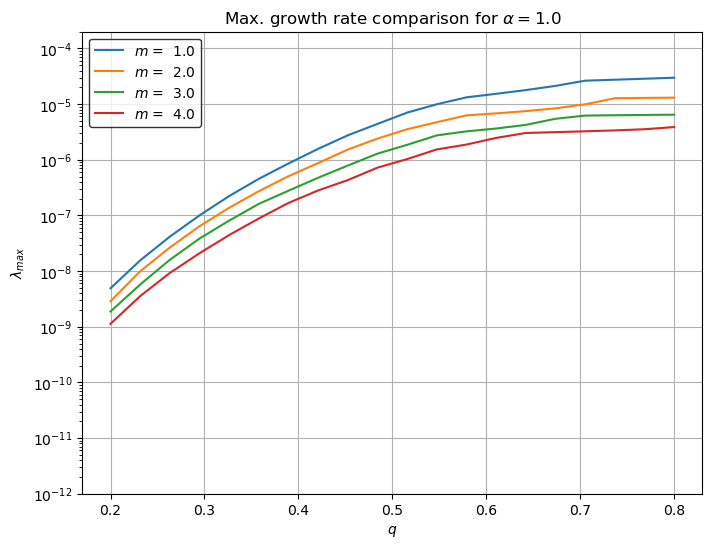

In [ ]:
### Plot of the max growth for diferent GH parameters
data1 = np.loadtxt('sheet_alpha1.csv', delimiter=',')
#data2 = np.loadtxt('sheet_alpha1.5.csv', delimiter=',')
#data3 = np.loadtxt('sheet_alpha1.3.csv', delimiter=',')

max_growth_plot(data1, 1)
#max_growth_plot(data2, 1.5)
#max_growth_plot(data3, 1.3)

Plot of the max growth for diferent CC parameters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


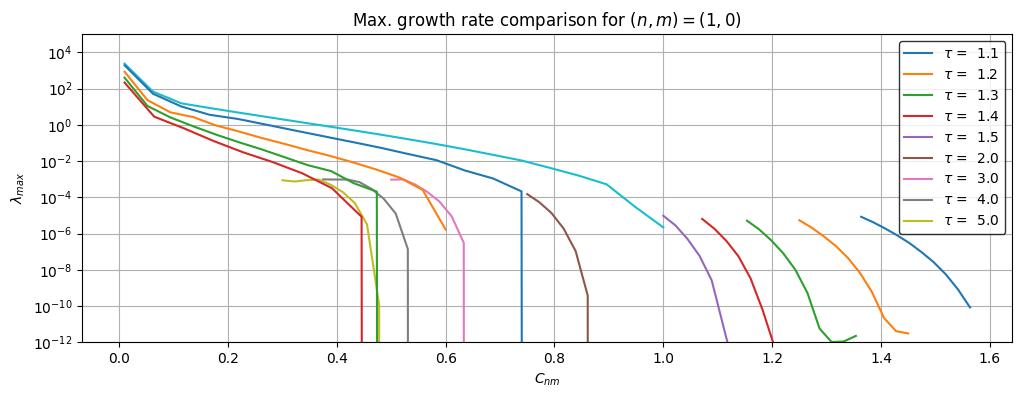

In [ ]:
### Plot of the max growth for diferent CC parameters
[n, mm] = [1, 0]
taus = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]
datax = []
for tau in taus :
    datax.append(np.linspace(1.5/tau, 1.5/tau + 0.2, 10))
datay = np.loadtxt('sheet_lambdas_nm10.csv', delimiter=',')

#Tmax_growth_plot(datax, datay, n, mm, taus)

prelabel = r'$\tau$ = '
labels = taus
axes = [r'$C_{nm}$', r'$\lambda_{max}$']
title = r'Max. growth rate comparison for $(n,m) = (%1.0f, %1.0f)$'%(n, mm)
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (12, 4)
fig, ax = plt.subplots()
plt.title(title)
ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.legend(loc='best')
for i in range(len(datay)):
    ax.plot(datax[i],datay[i],label=prelabel + r' %1.1f'%(labels[i]))
ax.legend(fancybox=True, shadow=True, facecolor='white')
plt.legend(frameon = 1).get_frame().set_edgecolor('black')
# The settings below are hardcoded
plt.grid()
ax.set_yscale('log')
ax.set_ylim([1e-12, 1e5])

datax = np.linspace(0.01,1,20)
datay = np.loadtxt('lambdas_tau15.csv', delimiter=',')
ax.plot(datax,datay)

datax = np.linspace(0.01,1,20)
datay = np.loadtxt('lambdas_tau2.csv', delimiter=',')
ax.plot(datax,datay)

datax = np.linspace(0.01,0.6,15)
datay = np.loadtxt('lambdas_tau3.csv', delimiter=',')
ax.plot(datax,datay)

datax = np.linspace(0.01,0.6,15)
datay = np.loadtxt('lambdas_tau4.csv', delimiter=',')
ax.plot(datax,datay)

datax = np.linspace(0.01,0.5,10)
datay = np.loadtxt('lambdas_tau5.csv', delimiter=',')
ax.plot(datax,datay)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


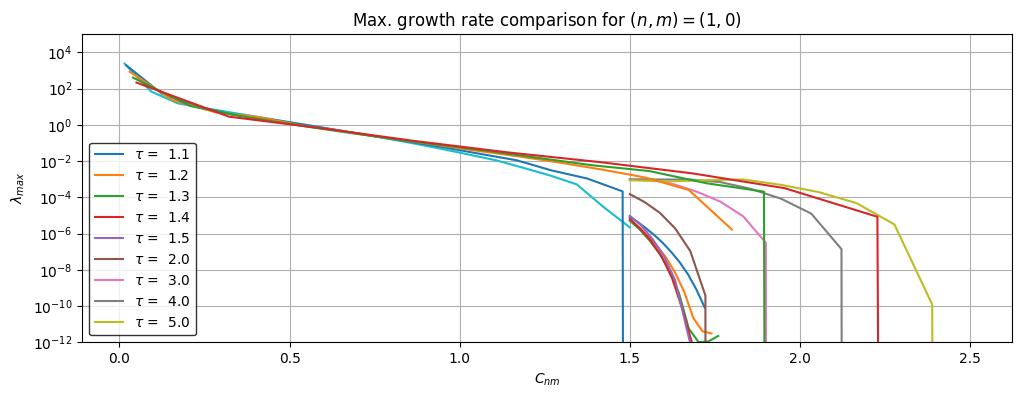

In [ ]:
### Plot of the max growth for diferent CC parameters
[n, mm] = [1, 0]
taus = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]
datax = []
for tau in taus :
    datax.append(np.linspace(1.5/tau, 1.5/tau + 0.2, 10))
datay = np.loadtxt('sheet_lambdas_nm10.csv', delimiter=',')

#Tmax_growth_plot(datax, datay, n, mm, taus)

prelabel = r'$\tau$ = '
labels = taus
axes = [r'$C_{nm}$', r'$\lambda_{max}$']
title = r'Max. growth rate comparison for $(n,m) = (%1.0f, %1.0f)$'%(n, mm)
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (12, 4)
fig, ax = plt.subplots()
plt.title(title)
ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.legend(loc='best')
for i in range(len(datay)):
    ax.plot(datax[i]*taus[i],datay[i],label=prelabel + r' %1.1f'%(labels[i]))
ax.legend(fancybox=True, shadow=True, facecolor='white')
plt.legend(frameon = 1).get_frame().set_edgecolor('black')
# The settings below are hardcoded
plt.grid()
ax.set_yscale('log')
ax.set_ylim([1e-12, 1e5])

datax = np.linspace(0.01,1,20)
datay = np.loadtxt('lambdas_tau15.csv', delimiter=',')
ax.plot(datax*1.5,datay)

datax = np.linspace(0.01,1,20)
datay = np.loadtxt('lambdas_tau2.csv', delimiter=',')
ax.plot(datax*2,datay)

datax = np.linspace(0.01,0.6,15)
datay = np.loadtxt('lambdas_tau3.csv', delimiter=',')
ax.plot(datax*3,datay)

datax = np.linspace(0.01,0.6,15)
datay = np.loadtxt('lambdas_tau4.csv', delimiter=',')
ax.plot(datax*4,datay)

datax = np.linspace(0.01,0.5,10)
datay = np.loadtxt('lambdas_tau5.csv', delimiter=',')
ax.plot(datax*5,datay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


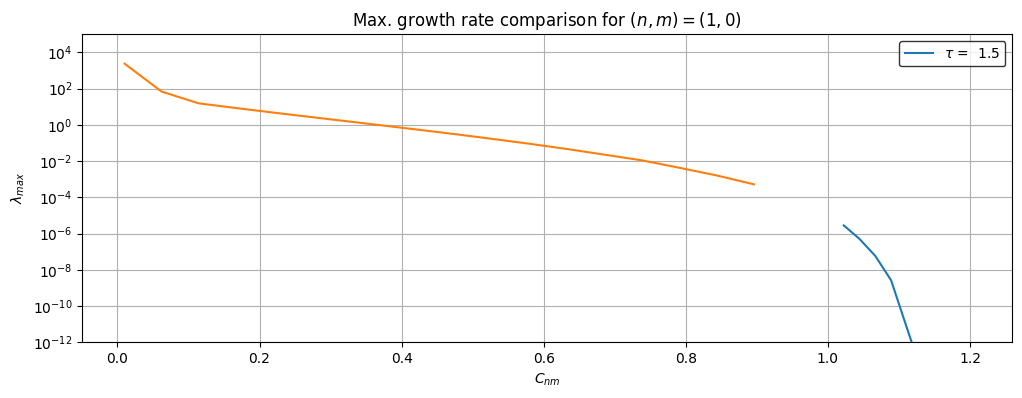

In [ ]:
### Plot of the max growth for diferent CC parameters
[n, mm] = [1, 0]
taus = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]
datax = []
for tau in taus :
    datax.append(np.linspace(1.5/tau, 1.5/tau + 0.2, 10))
datay = np.loadtxt('sheet_lambdas_nm10.csv', delimiter=',')
dataz = np.loadtxt('sheet_ks_nm10.csv', delimiter=',')

#Tmax_growth_plot(datax, datay, n, mm, taus)

prelabel = r'$\tau$ = '
labels = taus
axes = [r'$C_{nm}$', r'$\lambda_{max}$']
title = r'Max. growth rate comparison for $(n,m) = (%1.0f, %1.0f)$'%(n, mm)
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (12, 4)
fig, ax = plt.subplots()
plt.title(title)
ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.legend(loc='best')
for i in [-5]:#range(len(datay)):
    N2 = 1
    ax.plot(datax[i][N2:],datay[i][N2:],label=prelabel + r' %1.1f'%(labels[i]))
ax.legend(fancybox=True, shadow=True, facecolor='white')
plt.legend(frameon = 1).get_frame().set_edgecolor('black')
# The settings below are haArdcoded
plt.grid()
ax.set_yscale('log')
ax.set_ylim([1e-12, 1e5])

N1 = 2
datax2 = np.linspace(0.01,1,20)[:-N1]
datay2 = np.loadtxt('lambdas_tau15.csv', delimiter=',')[:-N1]
dataz2 = np.loadtxt('ks_tau15.csv', delimiter=',')[:-N1]
ax.plot(datax2,datay2)

# np.savetxt('C10_tau15_def.csv', np.concatenate([datax2, datax[i][N2:]]), delimiter=',')
# np.savetxt('lambda_tau15_def.csv', np.concatenate([datay2, datay[i][N2:]]), delimiter=',')
# np.savetxt('k_tau15_def.csv', np.concatenate([dataz2, dataz[i][N2:]]), delimiter=',')

In [ ]:
for tau in [1]:
    print(r'Curve for $\tau=%1.1f$' %tau)
    Cnms = np.loadtxt('C10_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    Cnmsbis = []
    # Cnms = np.linspace(Cnms[0],Cnms[1],10)
    lambdas = np.loadtxt('lambda_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    lambdasbis = []
    # lambdas = 10**np.linspace(np.log10(lambdas[0]),np.log10(lambdas[1]),10)
    ks = np.loadtxt('k_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    ksbis = []
    # ks = np.linspace(ks[0],ks[1],10)
    for i, Cnm in enumerate(Cnms):
        k = ks[i]
        if i > 0: k = ks[i-1]/2+k/2
        l = lambdas[i]
          
        if Cnm > 3:
            Cnmbis = Cnms[i-1]/2+Cnm/2
            Cnmsbis.append(Cnmbis)
            l_vals = [np.log10(l)-2, np.log10(l)+1]
            n_l = 50
            k_vals = [k-5, min(k+5,0)]
            n_k = 30
            first = True
            canvi = False
            print(k, l)
            lambdasbis.append(0)
            ksbis.append(0)
            while (first or canvi):
                first = False
                [l, k] = Tlambdamax(1, 0, Cnmbis, tau, 1, k_vals, n_k, l_vals, n_l)
                k_vals = [k - 2, k + 2]
                if (np.log10(l) > np.log10(lambdasbis[-1])+0.01):
                    n_k = 17
                    canvi = True
                    l_vals = [np.log10(l)-1, np.log10(l)+1]
                    print(k, l)
                    lambdasbis[-1] = l
                    ksbis[-1] = k
                else: canvi = False
            print(r'For Cnm = ' + str(np.round(Cnmbis,3)) + ', lambda = ' + str(lambdasbis[-1]) + ', k = ' + str(ksbis[-1]))

        l_vals = [np.log10(l)-0.5, np.log10(l)+0.5]
        n_l = 50
        k_vals = [k-5, min(k+5,0)]
        n_k = 30
        if l < 1e-4: first = True
        canvi = False
        print(k, l)
        while (first or canvi):
            first = False
            [l, k] = Tlambdamax(1, 0, Cnm, tau, 1, k_vals, n_k, l_vals, n_l)
            k_vals = [k - 2, k + 2]
            if (np.log10(l) > np.log10(lambdas[i])+0.01):
                ks[i] = k
                n_k = 17
                lambdas[i] = l
                canvi = True
                l_vals = [np.log10(l)-1, np.log10(l)+1]
                print(k, l)
            else: canvi = False
        lambdasbis.append(lambdas[i])
        Cnmsbis.append(Cnm)
        ksbis.append(ks[i])
        print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(lambdas[i]) + ', k = ' + str(ks[i]))
    np.savetxt('C10_tau%1.0f_v5.csv' %(tau*10), Cnmsbis, delimiter=',')
    np.savetxt('lambda_tau%1.0f_v5.csv' %(tau*10), lambdasbis, delimiter=',')
    np.savetxt('k_tau%1.0f_v5.csv' %(tau*10), ksbis, delimiter=',')

Curve for $\tau=1.0$
-185.86206896551724 9510.535369500783
For Cnm = 0.01, lambda = 9510.535369500783, k = -185.86206896551724
-162.50529887765822 1923.4523079431613
For Cnm = 0.022, lambda = 1923.4523079431613, k = -139.14852878979917
-112.79175870194014 787.6373002880129
For Cnm = 0.035, lambda = 787.6373002880129, k = -86.4349886140811
-69.75298491246852 261.18093056844225
For Cnm = 0.059, lambda = 261.18093056844225, k = -53.07098121085595
-41.4514198089678 125.0218048111342
For Cnm = 0.084, lambda = 125.0218048111342, k = -29.831858407079643
-27.581835702969695 71.84580836667257
For Cnm = 0.108, lambda = 71.84580836667257, k = -25.331812998859746
-23.30180286541121 46.29927429433047
For Cnm = 0.133, lambda = 46.29927429433047, k = -21.271792731962673
-20.092511011839676 31.384760227869386
For Cnm = 0.157, lambda = 31.384760227869386, k = -18.913229291716682
-17.846931152379536 22.312281204829098
For Cnm = 0.182, lambda = 22.312281204829098, k = -16.78063301304239
-16.1204847244359

In [2]:
for tau in [1]:
    print(r'Curve for $\tau=%1.1f$' %tau)
    Cnms = np.loadtxt('C10_tau%1.0f_final.csv' %(tau*10), delimiter=',')
    lambdas = np.loadtxt('lambda_tau%1.0f_final.csv' %(tau*10), delimiter=',')
    ks = np.loadtxt('k_tau%1.0f_final.csv' %(tau*10), delimiter=',')
    for i, Cnm in enumerate(Cnms):
        k_vals = [-100, -1]
        l_vals = [-12, -7]
        n_l = 100
        n_k = 200
        first = True
        canvi = False
        while (first):# or canvi):
            first = False
            [l, k] = Tlambdamax(1, 0, Cnm, tau, 1, k_vals, n_k, l_vals, n_l)
            k_vals = [k - 10, k + 10]
            if (np.log10(l) > np.log10(lambdas[i])+0.01):
                ks[i] = k
                n_k = 17
                n_l = 40
                lambdas[i] = l
                canvi = True
                l_vals = [np.log10(l)-1, np.log10(l)+1]
                #print(k, l)
            else: canvi = False
        print(r'For Cnm = ' + str(np.round(Cnm,3)) + ', lambda = ' + str(lambdas[i]) + ', k = ' + str(ks[i]))
    np.savetxt('C10_tau%1.0f_finalbis.csv' %(tau*10), Cnms, delimiter=',')
    np.savetxt('lambda_tau%1.0f_finalbis.csv' %(tau*10), lambdas, delimiter=',')
    np.savetxt('k_tau%1.0f_finalbis.csv' %(tau*10), ks, delimiter=',')

Curve for $\tau=1.0$
For Cnm = 1.75, lambda = 2.9365281383466674e-09, k = -97.01507537688443
For Cnm = 1.789, lambda = 5.283527639917277e-10, k = -92.53768844221105
For Cnm = 1.829, lambda = 3.441578464014756e-10, k = -95.59210526315789
For Cnm = 1.868, lambda = 4.724905762350631e-10, k = -3.9849246231155746
For Cnm = 1.908, lambda = 2.742276787418775e-10, k = -93.53266331658291
For Cnm = 1.947, lambda = 2.0309068618700513e-10, k = -92.10526315789474
For Cnm = 1.987, lambda = 2.187481687163534e-10, k = -99.07894736842105
For Cnm = 2.026, lambda = 2.104904144512022e-10, k = -41.79396984924623
For Cnm = 2.066, lambda = 1.807671290139246e-10, k = -100.5263157894737
For Cnm = 2.105, lambda = 2.2505675511957327e-10, k = -90.54773869346734
For Cnm = 2.145, lambda = 1.7675659740841778e-10, k = -101.18421052631581
For Cnm = 2.184, lambda = 1.8700086953219108e-10, k = -89.73684210526318
For Cnm = 2.224, lambda = 1.7887911704228114e-10, k = -94.01315789473686
For Cnm = 2.263, lambda = 1.85658425

In [ ]:
for tau in [11]:
    np.savetxt('C10_tau%1.0f_v2.csv' %(tau), np.concatenate([np.loadtxt('C10_tau%1.0f_ini.csv' %(tau), delimiter=','), np.loadtxt('C10_tau%1.0f_v1.csv' %(tau), delimiter=',')[1:]]), delimiter=',')
    np.savetxt('lambda_tau%1.0f_v2.csv' %(tau), np.concatenate([np.loadtxt('lambda_tau%1.0f_ini.csv' %(tau), delimiter=','), np.loadtxt('lambda_tau%1.0f_v1.csv' %(tau), delimiter=',')[1:]]), delimiter=',')
    np.savetxt('k_tau%1.0f_v2.csv' %(tau), np.concatenate([np.loadtxt('k_tau%1.0f_ini.csv' %(tau), delimiter=','), np.loadtxt('k_tau%1.0f_v1.csv' %(tau), delimiter=',')[1:]]), delimiter=',')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


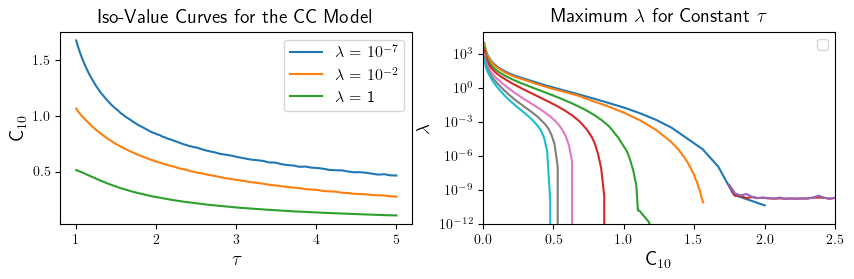

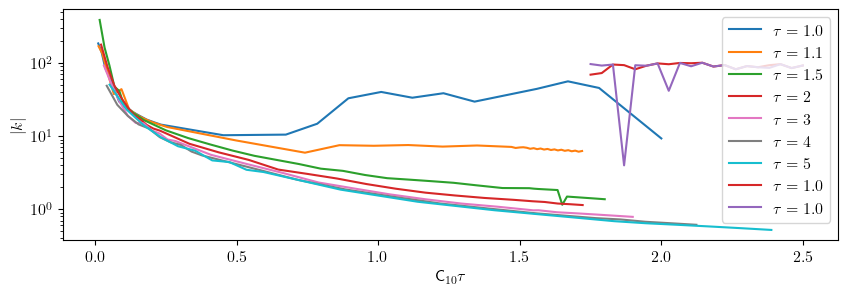

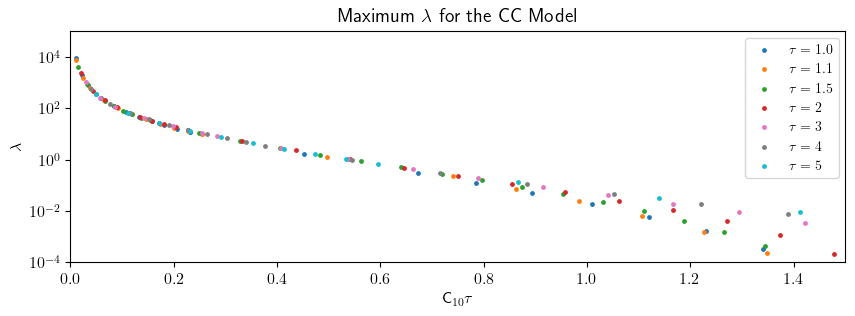

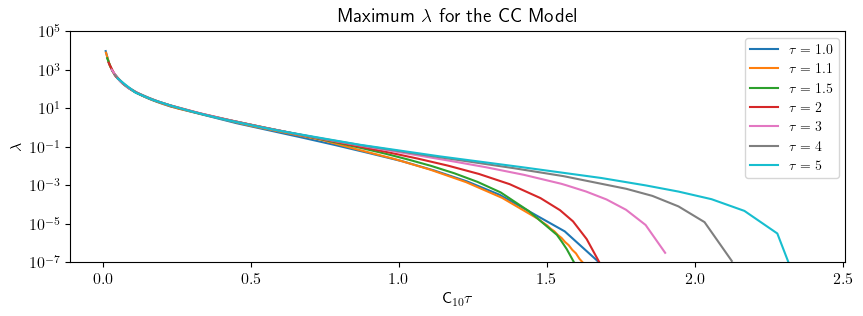

In [2]:
### Plot of the CC limit curves
m = 1

datax = [obtain_taus()[1:], obtain_taus()[1:], obtain_taus()[1:]]
datay = [np.loadtxt('sheet_cnms_nm10.csv', delimiter=',')[1:], np.loadtxt('sheet_cnms_nm10_1e-2.csv', delimiter=',')[1:], np.loadtxt('sheet_cnms_nm10_1.csv', delimiter=',')[1:]] #np.loadtxt('sheet_cnms_nm11.csv', delimiter=','), 
prelabel = r'$\lambda$ = '
labels = [r'$10^{-7}$',r'$10^{-2}$',r'1']
axes = [r'$\tau$', r'C$_{10}$']
title = 'Iso-Value Curves for the CC Model'
#np.savetxt('isovaluesCC.csv', datay, delimiter=',')
#np.savetxt('tausisovCC.csv', datax, delimiter=',')

plt.rcParams["figure.figsize"] = (10, 2.5)
fig, [ax0,ax1] = plt.subplots(ncols=2, nrows=1)
for i in range(3):
    ax0.plot(datax[i], datay[i], label = prelabel+labels[i])
ax0.set_title(title, fontsize=14)
ax0.set_xlabel(axes[0], fontsize=14)
ax0.set_ylabel(axes[1], fontsize=14)
# comparison_lineplot(datax, [datay[0]*(datax[0]**0), datay[1]*(datax[1]**0), datay[2]*(datax[2]**0)], prelabel, labels, axes, title)
# plt.plot(datax[0], 1.5684*datax[0]**-0.814, color = 'k', linestyle = (0,(5,10)), linewidth = 0.9, label = r'$C_{10}\tau^{0.8}=1.568$')
# plt.plot(datax[1], 1.058*datax[1]**-0.835, color = 'k', linestyle = (5,(10,3)), linewidth = 0.9, label = r'$C_{10}\tau^{0.8}=1.058$')
# plt.plot(datax[2], 0.5323*datax[2]**-0.994, color = 'k', linestyle = '--', linewidth = 0.9, label = r'$C_{10}\tau=0.532$')
plt.ylim(0,1.8)
plt.legend()

plt.rcParams.update({'font.size': 11.5})

plt.rcParams["figure.figsize"] = (10, 3)

#fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()

for tau in [1, 1.1, 1.5]:
    datax = np.loadtxt('C10_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    datay = np.loadtxt('lambda_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    dataz = np.loadtxt('k_tau%1.0f_v5.csv' %(tau*10), delimiter=',')

    ax1.plot(datax, datay, label=r'$\tau = %1.1f$' %tau)
    ax2.plot(datax*tau, abs(dataz), label=r'$\tau = %1.1f$' %tau)
    ax3.scatter(datax*tau, datay, label=r'$\tau = %1.1f$' %tau, s=6)
    ax4.plot(datax*tau, datay, label=r'$\tau = %1.1f$' %tau)
    #ax3.scatter(np.sqrt((datax*tau)**2+(1-1/2/tau)**2/700), datay, label=r'$\tau = %1.1f$' %tau)

colors = ['tab:blue','tab:green','tab:red','tab:pink','tab:gray','tab:cyan']

for tau in [2,3,4,5]:
    datax = np.loadtxt('C10_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    datay = np.loadtxt('lambda_tau%1.0f_v5.csv' %(tau*10), delimiter=',')
    dataz = np.loadtxt('k_tau%1.0f_v5.csv' %(tau*10), delimiter=',')

    ax1.plot(datax, datay, label=r'$\tau = %1.0f$' %tau, color = colors[tau])
    ax2.plot(datax[:-1]*tau, abs(dataz[:-1]), label=r'$\tau = %1.0f$' %tau, color = colors[tau])
    ax3.scatter(datax[:-1]*tau, datay[:-1], label=r'$\tau = %1.0f$' %tau, s=6, color = colors[tau])
    ax4.plot(datax[:-1]*tau, datay[:-1], label=r'$\tau = %1.0f$' %tau, color = colors[tau])
    #ax3.scatter(np.sqrt((datax*tau)**2+(1-1/2/tau)**2/700), datay, label=r'$\tau = %1.0f$' %tau)


tau = 1
Cnms = np.loadtxt('C10_tau%1.0f_final.csv' %(tau*10), delimiter=',')
lambdas = np.loadtxt('lambda_tau%1.0f_final.csv' %(tau*10), delimiter=',')
ks = np.loadtxt('k_tau%1.0f_final.csv' %(tau*10), delimiter=',')
ax1.plot(Cnms, lambdas, label=r'$\tau = %1.1f$' %tau)
ax2.plot(Cnms*tau, abs(ks), label=r'$\tau = %1.1f$' %tau)
Cnms = np.loadtxt('C10_tau%1.0f_finalbis.csv' %(tau*10), delimiter=',')
lambdas = np.loadtxt('lambda_tau%1.0f_finalbis.csv' %(tau*10), delimiter=',')
ks = np.loadtxt('k_tau%1.0f_finalbis.csv' %(tau*10), delimiter=',')
ax1.plot(Cnms, lambdas, label=r'$\tau = %1.1f$' %tau)
ax2.plot(Cnms*tau, abs(ks), label=r'$\tau = %1.1f$' %tau)

ax1.set_yscale('log')
ax1.set_ylim(1e-12,1e5)
ax2.set_yscale('log')
# ax2.set_ylim(0,20)
ax3.set_yscale('log')
ax3.set_ylim(1e-4,1e5)
ax4.set_yscale('log')
ax4.set_ylim(1e-7,1e5)

ax1.set_xlabel(r'C$_{10}$', fontsize = 14)
ax1.set_xlim(0,2.5)
ax2.set_xlabel(r'C$_{10}\tau$')
ax3.set_xlabel(r'C$_{10}\tau$')
ax3.set_xlim(0,1.5)
ax4.set_xlabel(r'C$_{10}\tau$')
# ax4.set_xlim(0,1.5)

ax1.set_ylabel(r'$\lambda$', fontsize = 14)
ax2.set_ylabel(r'$|k|$')
ax3.set_ylabel(r'$\lambda$')
ax4.set_ylabel(r'$\lambda$')

ax1.set_title(r'Maximum $\lambda$ for Constant $\tau$', fontsize='14')
ax3.set_title(r'Maximum $\lambda$ for the CC Model', fontsize='14')
ax4.set_title(r'Maximum $\lambda$ for the CC Model', fontsize='14')

ax0.legend()
# ax1.legend()
ax2.legend()
ax3.legend(fontsize=10)
ax4.legend(fontsize=10)

Finds the max growth for the L model for each alpha

In [ ]:
# lambdamax for the L model
alphas = np.concatenate((np.linspace(0.1,0.7,30), np.linspace(0.8,5,40)))
m = 1
n_k = 30
n_l = 30
l_vals = [-4, 2]
k_vals = [0, 5]

lambdamaxs = []
ks = []
for alpha in alphas:
    print(alpha)
    k_vals = [0, alpha]#[-alpha*0.4-0.05, alpha*0.4+0.05]
    [l, k] = Llambdamax(alpha, m, k_vals, n_k, l_vals, n_l)
    lambdamaxs.append(l)
    ks.append(k)
print(ks)

np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', lambdamaxs, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', ks, delimiter=',')

Plot the max growth for the L model

In [ ]:
# L max growth curve
alphas = np.concatenate((np.linspace(0.1,0.7,30), np.linspace(0.8,5,40)))
lambdamaxs = np.loadtxt('sheet_lambdas_L.csv', delimiter=',')
ks = np.loadtxt('sheet_ks_L.csv', delimiter=',')
for i in range(len(lambdamaxs[1:])):
    if lambdamaxs[i]<1e-2 and lambdamaxs[i+1]>1e-2: print('For lambda = 0.01, alpha =', ((lambdamaxs[i+1]-1e-2)*alphas[i+1]+(1e-2-lambdamaxs[i])*alphas[i])/(lambdamaxs[i+1]-lambdamaxs[i]))
    if lambdamaxs[i]<1 and lambdamaxs[i+1]>1: print('For lambda = 1, alpha =',  ((lambdamaxs[i+1]-1)*alphas[i+1]+(1-lambdamaxs[i])*alphas[i])/(lambdamaxs[i+1]-lambdamaxs[i]))
axes = [r'$\alpha$',r'$\lambda_{max}$']
title = r'Maximum $\lambda$ for the Lundquist model'

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5, 3)

def set_basics(title, axes, markzero = False):
    fig, ax = plt.subplots()
    plt.title(title)
    if markzero:
        plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    ax.set_xlabel(axes[0])
    ax.set_ylabel(axes[1])
    #ax.legend(loc='best')
    return fig, ax

fig, ax = set_basics(title, axes, markzero = False)
ax.plot(alphas, lambdamaxs)
ax.set_ylim([1e-4, 50])
ax.set_yscale('log')


Finds the critical (Cnm,k) for given parameters [(n,m), tau, lambda0]

In [ ]:
### Critical Cnm
m = 1
[n, mm] = [1, 0]
tau = 4
k = -1
l0 = 1e-7
[Cnmmin, Cnmmax] = [1.5/tau, 1.5/tau + 0.2]
[Cnm, k] = Tcritical_Cnm(n, mm, m, tau, l0, Cnmmin, Cnmmax, k)
print('Instability: m =', m)
print('Threshold: l0 =', l0)
print('tau =', tau)
print('Cnm =', Cnm)
print('k =', k)

Finds the critical (q,k) for given parameters [alpha, lambda0]

In [ ]:
### Critical q
m = 1
alpha = 2
l0 = 1e-2
[qmin, qmax] = [200, 201]
[q, k] = critical_q(alpha, l0, qmin, qmax)
print('Instability: m =', m)
print('Threshold: l0 =', l0)
print('Force parameter: alpha =', alpha)
print('Critical twist parameter: q =', q)
print('k =', k)

Proves per l0 = 1e-2

In [ ]:
q = 5
alpha = 2
[l,k]= lambdamax(alpha, q, 1, [-0.7*q,-0.5*q], 50, [-6,-1], 10)
print('l =', l, 'for k/q =', k/q)

l0 = 1e-2
#[q,k] = critical_q(alpha, l0, q-0.1, q+0.1)
#print('q =', q, 'and k/q =', k/q, 'for alpha =', alpha)
"""
[l,k]= lambdamax(2, 300, 1, [-2*q,-0.2*q], 30, [-6,-1.5], 10)
print('l =', l, 'for k =', k)
[l,k]= lambdamax(2, 200, 1, [-2*q,-0.2*q], 30, [-6,-1.5], 10)
print('l =', l, 'for k =', k)
[l,k]= lambdamax(2, 100, 1, [-2*q,-0.2*q], 30, [-7,-1.5], 10)
print('l =', l, 'for k =', k)
"""

Finds the limit curve for CC for a given threshold lambda0 and parameters (n,m)

In [ ]:
### Limit curve for CC
#For Cnm = 1.05, lambda = 0.006414986399197357, k = -0.9591836734693873
#For Cnm = 0.35, lambda = 2.894200279397953, k = -196.9387755102041
import warnings
warnings.filterwarnings('ignore')

m = 1
[n, mm] = [1, 0]
taus = obtain_taus3()
ls = [1]#[4e-8, 7e-8, 1e-7]
k = -12
Cnm = 0.5

crit_Cnms = []
crit_k = []
for i in range(len(ls)):
    this_curve = []
    ks = []
    print('Obtaining curve for lambda =', ls[i])
    for tau in taus:
        [Cnm, k] = Tcritical_Cnm(n, mm, m, tau, ls[i], Cnm-0.01, Cnm+0.02, k)
        #[Cnm, k] = Tcritical_Cnm(n, mm, m, tau, ls[i], Cnm, Cnm + 0.2, k)
        this_curve.append(Cnm)
        ks.append(k)
        print(r'For tau = ' + str(np.round(tau,3)) + ', Cnm = ' + str(np.round(Cnm,3)) + ', k = ' + str(np.round(k,3)))
    print('')
    crit_Cnms.append(this_curve)
    crit_k.append(ks)
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', crit_Cnms, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', crit_k, delimiter=',')

In [ ]:
#For tau = 1.0, Cnm = 1.05, k = -13.0
l_range = 10**np.linspace(-5,1)
[n,mm] = [1,0]
m = 1
[tau,Cnm] = [1.01,0.4]
k = -6.5
func_Dlk = lambda l : Tdisp_F(l, n, mm, m, k, Cnm, tau) # Definition of a single variable function D(l).
l = biggest_root(func_Dlk, l_range)
print('For k =', k, 'l = ', l)


Finds the limit curve for GH for a given threshold lambda0

In [ ]:
### Limit curve for GH
m = 1
#alphas = obtain_alphas()
#alphas = [2.95]#np.linspace(2.6,3.6,50)
alphas =  obtain_alphas2()
ls = [1e-7]#[4e-8, 7e-8, 1e-7]
qs = [[0.3, 1]]#[[0.20, 0.55], [0.25, 0.60], [0.25, 0.60]]

crit_qs = []
crit_ks = []
for i in range(len(ls)):
    this_curveq = []
    this_curvek = []
    print('Obtaining curve for lambda =', ls[i])
    for alpha in alphas:
        [q, k] = critical_q(alpha, ls[i], qs[i][0], qs[i][1], tol = 0.01)
        this_curveq.append(q)
        this_curvek.append(k/q)
        print(r'For alpha = ' + str(np.round(alpha,3)) + ', q = ' + str(np.round(q,3)) + ', k/q = ' + str(np.round(k/q,3)))
    print('')
    crit_qs.append(this_curveq)
    crit_ks.append(this_curvek)
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', crit_qs, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', crit_ks, delimiter=',')

Plots the limit curve for CC for a given threshold lambda0 and parameters (n,m)

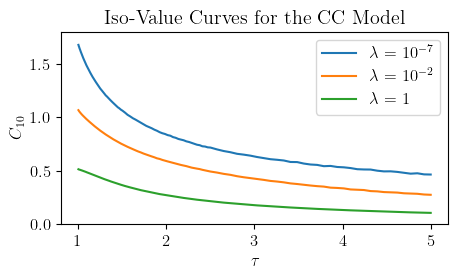

In [ ]:
### Plot of the CC limit curves
m = 1

datax = [obtain_taus()[1:], obtain_taus()[1:], obtain_taus()[1:]]
datay = [np.loadtxt('sheet_cnms_nm10.csv', delimiter=',')[1:], np.loadtxt('sheet_cnms_nm10_1e-2.csv', delimiter=',')[1:], np.loadtxt('sheet_cnms_nm10_1.csv', delimiter=',')[1:]] #np.loadtxt('sheet_cnms_nm11.csv', delimiter=','), 
prelabel = r'$\lambda$ = '
labels = [r'$10^{-7}$',r'$10^{-2}$',r'1']
axes = [r'$\tau$', r'$C_{10}$']
title = 'Iso-Value Curves for the CC Model'
#np.savetxt('isovaluesCC.csv', datay, delimiter=',')
#np.savetxt('tausisovCC.csv', datax, delimiter=',')

plt.rcParams["figure.figsize"] = (5, 2.5)

comparison_lineplot(datax, [datay[0]*(datax[0]**0), datay[1]*(datax[1]**0), datay[2]*(datax[2]**0)], prelabel, labels, axes, title)
# plt.plot(datax[0], 1.5684*datax[0]**-0.814, color = 'k', linestyle = (0,(5,10)), linewidth = 0.9, label = r'$C_{10}\tau^{0.8}=1.568$')
# plt.plot(datax[1], 1.058*datax[1]**-0.835, color = 'k', linestyle = (5,(10,3)), linewidth = 0.9, label = r'$C_{10}\tau^{0.8}=1.058$')
# plt.plot(datax[2], 0.5323*datax[2]**-0.994, color = 'k', linestyle = '--', linewidth = 0.9, label = r'$C_{10}\tau=0.532$')
plt.ylim(0,1.8)
plt.legend()


Plots the limit curve for GH for a given threshold lambda0

In [ ]:
### Plot of the GH limit curves
m = 1
datax = [obtain_alphas2()] 
datay = [np.loadtxt('sheet_m1l1e-7.csv', delimiter=',')]
#datax = [datax[:-8]]
#datay = [datay[:-8]]
#datax = [datax, datax]
#datay = [datay, datay]
prelabel = r'$\lambda_0$ = '
labels = ['1e-7','1e-7']
axes = [r'$\alpha$', r'$q$']
title = 'Stability curve for the kink instability $(m=1)$'#threshold $\lambda_0 = 1e-7$'
comparison_lineplot(datax, datay, prelabel, labels, axes, title)

Combining stability plots with twist and Lorentz forces

In [ ]:
from lorentzVStwist import line_colorplot, absLorentz, Lorentz, Twist, avg

# Lines that will be plotted
l = 10**(-7)
datax = obtain_alphas2() 
datay = np.loadtxt('sheet_m1l1e-7.csv', delimiter=',')
datax = [datax[:-8]]
datay = [datay[:-8]]
datax = [obtain_alphas()]
datay = [np.loadtxt('sheet_m1.csv', delimiter=',')[2]]
prelabel = r'$\lambda_0$ = '
labels = ['1e-7','1e-7']
axes = [r'$\alpha$', r'$q$']

N = 50
rr = np.linspace(0.01,1,100)
a = np.linspace(1,datax[0][-1],N)
q = np.linspace(0.27,0.8,N)

In [ ]:
# Twist plot
Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(Twist, a[j], q[i])
label = 'Average twist'
ticks = np.linspace(0.24,0.8,8)
cmap = 'viridis'
line_colorplot(a, q, Z, label, ticks, cmap, datax, datay, prelabel, labels, axes)

In [ ]:
# Lorentz force plot
Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(Lorentz, a[j], q[i])
label = 'Average Lorentz force'
ticks = np.linspace(0,0.030,7)
cmap = 'plasma'
line_colorplot(a, q, Z, label, ticks, cmap, datax, datay, prelabel, labels, axes)

# Mean over the absolute value of the Lorentz force plot
Z = np.empty((N, N))
for i in range(N):
    for j in range(N):
        Z[i][j] = avg(absLorentz, a[j], q[i])
label = 'Average absolute value of the Lorentz force'
ticks = np.linspace(0,0.35,11)
cmap = 'plasma'
line_colorplot(a, q, Z, label, ticks, cmap, datax, datay, prelabel, labels, axes)

Application to real data: lifetime estimation. 
T is proportional to:
 - 1/sqrt(lambda)
 - sqrt(obs_np)
 - obs_R
 - 1/obs_B0
I.e. T is proportional to R/B_0*sqrt(n_p)

In [ ]:
l_vals = [-13,2]
n_k = 100
n_l = 50

mp = 1.673e-27 # proton mass in kg
ratio = 1.16 # ratio between proton density and mass density (see equation 1.13 in thesis)
mu0 = 4*math.pi*1e-7 # magnetic permitivity
sec = 86400 # number of seconds in a day

def T_days(l, obs_B0, obs_R, obs_np):
    sigma = np.sqrt(l)
    T = 1/sigma
    obs_rho = ratio*mp*obs_np*1e6
    factor = (obs_R/obs_B0)*np.sqrt(mu0*obs_rho)
    T_d = T*factor/sec
    return T_d

def instability_times(m, obs_B0, obs_R, obs_np, obs_param, TP):
    if TP == 'GH':
        [obs_q, obs_alpha] = obs_param
        k_vals = get_k_vals(m, obs_q)
        [l, k] = lambdamax(obs_alpha, obs_q, m, k_vals, n_k, l_vals, n_l)
        T_d = T_days(l, obs_B0, obs_R, obs_np)
        print('\nGH model, m =', m)
        print('lambda =', l, ', k =', k)
        print('alpha =', obs_alpha, ', q =', obs_q)
        print('Instability time:', np.round(T_d, 3), 'days, (', np.round(T_d/365, 3), 'years, ', np.round(T_d*24, 3), 'hours)')
    if TP == 'L':
        obs_alpha = obs_param
        k_vals = [-0.1,2*obs_alpha]
        [l, k] = Llambdamax(obs_alpha, m, k_vals, n_k, l_vals, n_l)
        T_d = T_days(l, obs_B0, obs_R, obs_np)
        print('\nL model, m =', m)
        print('lambda =', l, ', k =', k)
        print('alpha =', obs_alpha)
        print('Instability time:', np.round(T_d, 3), 'days, (', np.round(T_d/365, 3), 'years, ', np.round(T_d*24, 3), 'hours)')
    if TP == 'CC':
        [obs_Cnm, obs_tau, obs_n, obs_mm] = obs_param
        k_vals = [-20,-0.2]
        [l, k] = Tlambdamax(obs_n, obs_mm, obs_Cnm, obs_tau, m, k_vals, n_k, l_vals, n_l)
        T_d = T_days(l, obs_B0, obs_R, obs_np)
        print('\nCC model, m =', m)
        print('lambda =', l, ', k =', k)
        print('Cnm =', obs_Cnm, 'tau =', obs_tau)
        print('Instability time:', np.round(T_d, 3), 'days, (', np.round(T_d/365, 3), 'years, ', np.round(T_d*24, 3), 'hours)')


In [1]:
# Parameters for applications

# Axial magnetic field in teslas (10nT - 100nT)
obs_B0 = 50e-9 
[obs_B0_min, obs_B0_max] = [10e-9,100e-9]

# Radius in meters (1e-7Au - 1e-2Au)
Au = 1.496e11
obs_R = 1e-3*Au
[obs_R_min, obs_R_max] = [1e-7*Au,1e-2*Au]

# Number of protons per cm^3 (10-1e6)
obs_np = 200
[obs_np_min, obs_np_max] = [10,1e6]

T_max = T_days(1, obs_B0_min, obs_R_max, obs_np_max)
T_min = T_days(1, obs_B0_max, obs_R_min, obs_np_min)
print('Maximum factor:', T_max*sec, 'sec')
print('To have a characteristic time of a day, lambda must be arround', (T_max)**2)
print('Minimum factor:', T_min*sec, 'sec')
print('To have a characteristic time of a day, lambda must be arround', (T_min)**2)


NameError: name 'T_days' is not defined

In [ ]:
# Magnetic field parameters
obs_alpha = 3
obs_q = 1.5

obs_Cnm = 0.27
obs_tau = 3

# Lifetime of the instabilities for diferent twist profiles
m = 1
instability_times(m, obs_B0, obs_R, obs_np, obs_alpha, 'L')
instability_times(m, obs_B0, obs_R, obs_np, [obs_q, obs_alpha], 'GH')
instability_times(m, obs_B0, obs_R, obs_np, [obs_Cnm, obs_tau,1,0], 'CC')

Lifetimes for the Lundquist model

In [ ]:
# Lifetime for the Lundquist model
axes = [r'$\alpha$',r'$T$ (days)']
title = (r'Lifetime for the Lundquist model')
fig, ax1 = set_basics(title, axes, markzero = False)
ax1.set_yscale('log')
axes = [r'$\alpha$',r'$T$ (hours)']
title = (r'Lifetime for the Lundquist model')
fig, ax2 = set_basics(title, axes, markzero = False)
plt.yticks([0,3,6,12,18,24,36,48,60,72,84])#1,2,3,4,5,
plt.xticks(np.linspace(0,5,11))
ax2.grid( 'off', axis='y' )
ax2.set_ylim([0,84])

alphas = np.concatenate((np.linspace(0.1,0.7,30), np.linspace(0.8,5,40)))
lambdamaxs = np.loadtxt('sheet_lambdas_L.csv', delimiter=',')
for obs_R in [obs_R_max, obs_R_min]:
    for [obs_B0, obs_np] in [[obs_B0_min,obs_np_max],[obs_B0_max,obs_np_max],[obs_B0_min,obs_np_min],[obs_B0_max,obs_np_min]]:
            times = []
            for l in lambdamaxs:
                times.append(T_days(l, obs_B0, obs_R, obs_np))

            ax1.plot(alphas, times, label = r'$n_p = 10^{%1.0f} cm^{-3}$, $R = 10^{%1.0f}$Au, $B_0 = %1.0f$nT' %(np.log10(obs_np), np.log10(obs_R/Au), obs_B0*1e9))

            times = [t*24 for t in times]

            ax2.plot(alphas, times, label = r'$n_p = 10^{%1.0f} cm^{-3}$, $R = 10^{%1.0f}$Au, $B_0 = %1.0f$nT' %(np.log10(obs_np), np.log10(obs_R/Au), obs_B0*1e9))

#ax1.legend(loc='center left', bbox_to_anchor=(0.2, -0.4))
ax2.legend()


Plots the change of model for different MF configuration

In [ ]:
N = 100
[n,mm] = [1,0]
Cnms = [1]#np.linspace(0.5,2,5) #1.78 # [0.5,2]
taus = np.linspace(1e-4,5,50) #1.1 # [0,4]
qs = np.linspace(0, 6, 200)
alphas = np.linspace(1e-4, 10, 400)
compare_change_of_model(n, mm, Cnms, taus, qs, alphas, N = 100)

Converts the CC's threshold parameters to GH

In [ ]:
### Transforming CC's threshold parameters to GH
N = 100
m = 1
[n, mm] = [1, 0]
tau = obtain_taus()
Cnm = np.loadtxt('sheet_cnms_nm10.csv', delimiter=',')
print(len(Cnm))

qs = np.linspace(0, 1.5, 200)
alphas = np.linspace(1e-4, 2, 400)
Bs = np.linspace(0.9, 1.1, 30)
q = []
alpha = []
for i in range(len(Cnm)):
    if i%10 == 0:
        print(i)
    #[q_approx, alpha_approx] = Teresa_to_GH(n, mm, Cnm[i], tau[i], qs, alphas, N)
    [q_approx, alpha_approx] = Teresa_to_GH_bis(n, mm, Cnm[i], tau[i], qs, alphas, Bs, N)[0:2]
    q.append(q_approx)
    alpha.append(alpha_approx)
axes = [r'$\alpha$',r'$q$']
title = "Teresa's thresholds to GH for $\lambda_0 = 1e-7$"
plot_lim_Teresa(alpha, q, axes, title, markzero = False)
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', alpha, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', q, delimiter=',')

Convertis the GH's threshold parameters to CC

In [ ]:
### Converting GH's threshold parameters to CC
N = 100
m = 1
[n, mm] = [1, 0]
datax = obtain_alphas2()
datay = np.loadtxt('sheet_m1l1e-7.csv', delimiter=',')
alpha = datax[:-8]
q = datay[:-8]

Cnms = np.linspace(0.2,4,400)
taus = np.linspace(1,15,600)
Cnm = []
tau = []
print(len(q))
for i in range(len(q)):
    if i%10 == 0:
        print(i)
    [Cnm_approx, tau_approx] = GH_to_Teresa(n, mm, Cnms, taus, q[i], alpha[i], N)
    Cnm.append(Cnm_approx)
    tau.append(tau_approx)
axes = [r'$\tau$',r'$C_{nm}$']
title = "GH's thresholds to CC for $\lambda_0 = 1e-7$"
plot_lim_Teresa(tau, Cnm, axes, title, markzero = False)
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', Cnm, delimiter=',')
np.savetxt('sheet_'+str(uuid.uuid4())+'.csv', tau, delimiter=',')

Plot the comparison plots

In [ ]:
### THRESHOLD COMPARISON FOR GH PARAMETERS
small_alpha = False
alpha1 = obtain_alphas2()[:-8] if not small_alpha else obtain_alphas()
#alpha2 = np.loadtxt('sheet_TtoGH_alpha.csv', delimiter=',')
alpha3 = np.loadtxt('sheet_TtoGH_alpha_nm10_2.csv', delimiter=',')
alpha4 = np.loadtxt('sheet_TtoGH_alpha_nm11_2.csv', delimiter=',')
q1 = np.loadtxt('sheet_m1l1e-7.csv', delimiter=',')[:-8] if not small_alpha else np.loadtxt('sheet_m1.csv', delimiter=',')[2]
#q2 = np.loadtxt('sheet_TtoGH_q.csv', delimiter=',')
q3 = np.loadtxt('sheet_TtoGH_q_nm10_2.csv', delimiter=',')
q4 = np.loadtxt('sheet_TtoGH_q_nm11_2.csv', delimiter=',')

title = 'Threshold comparison for GH parameters'
axes = [r'$\alpha$', r'$q$']
markzero = False
fig, ax = set_basics(title, axes, markzero)
ax.plot(alpha1, q1, label = 'Method applied to the GH')
#ax.plot(alpha2, q2, label = 'Conversion of the CC threshold')
ax.plot(alpha3, q3, label = 'Conversion of the CC threshold for (n,m) = (1,0)')
ax.plot(alpha4, q4, label = 'Conversion of the CC threshold for (n,m) = (1,1)')
ax.legend(fancybox=True, shadow=True, facecolor='white')
plt.legend(frameon = 1).get_frame().set_edgecolor('black')

In [ ]:
### THRESHOLD COMPARISON FOR CC PARAMETERS
tau1 = obtain_taus()
tau2 = np.loadtxt('sheet_GHtoT_tau.csv', delimiter=',')
Cnm1 = np.loadtxt('sheet_cnms_nm10.csv', delimiter=',')
Cnm2 = np.loadtxt('sheet_GHtoT_Cnm.csv', delimiter=',')

title = 'Threshold comparison for CC parameters'
axes = [r'$\tau$', r'$C_{nm}$']
markzero = False
fig, ax = set_basics(title, axes, markzero)
ax.plot(tau1, Cnm1, label = 'Method applied to the CC')
ax.plot(tau2, Cnm2, label = 'Conversion of the GH threshold')
ax.legend(fancybox=True, shadow=True, facecolor='white')
plt.legend(frameon = 1).get_frame().set_edgecolor('black')

In [ ]:
#PLOTS TWIST PRESENTATION

alpha1 = 1
alpha2 = 1
alpha3 = 1
q = 0.6
Cnm = 0.7
tau = 1.5
n = 1
mm = 0

rr = np.linspace(R0,Rf,100)
L = [[],[]]
GH = [[],[],[],[]]
CC = [[],[],[],[],[],[]]
twists = [[],[],[],[],[],[]]
for r in rr:
    L[0].append(LBz(r, alpha1))
    L[1].append(LBtheta(r, alpha1))
    twists[0].append(LBtheta(r, alpha1)/r/LBz(r, alpha1))
    GH[2].append(Bz(r, q, alpha3))
    GH[3].append(Btheta(r, q, alpha3))
    twists[5].append(Btheta(r, q, alpha3)/r/Bz(r, q, alpha3))
    GH[0].append(Bz(r, q, alpha2))
    GH[1].append(Btheta(r, q, alpha2))
    twists[1].append(Btheta(r, q, alpha2)/r/Bz(r, q, alpha2))
    CC[0].append(TBz(r, n, mm, Cnm, tau))
    CC[1].append(TBtheta(r, n, mm, Cnm, tau))
    twists[2].append(TBtheta(r, n, mm, Cnm, tau)/r/TBz(r, n, mm, Cnm, tau))
    CC[2].append(TBz(r, n, 1, Cnm, tau))
    CC[3].append(TBtheta(r, n, 1, Cnm, tau))
    twists[3].append(TBtheta(r, n, 1, Cnm, tau)/r/TBz(r, n, 1, Cnm, tau))
    CC[4].append(TBz(r, 3, 2, Cnm, tau))
    CC[5].append(TBtheta(r, 3, 2, Cnm, tau))
    twists[4].append(TBtheta(r, 3, 2, Cnm, tau)/r/TBz(r, 3, 2, Cnm, tau))
plt.figure(figsize=(6,6))
plt.plot(rr,L[0], 'b')
plt.plot(rr,L[1], 'g')
plt.plot(rr,GH[0], 'b--')
plt.plot(rr,GH[1], 'g--')
plt.plot(rr,GH[2], 'b:')
plt.plot(rr,GH[3], 'g:')
plt.xlabel(r'$\bar{r}$')
plt.ylabel(r'$B$')
plt.legend([r'Lund: $B_z$, $\alpha = 1$',r'Lund: $B_{\theta}$',r'GH: $B_z$, $(\alpha,q)=(1.6,0.6)$',r'GH: $B_{\theta}$,r', r'GH: $B_z$, $(\alpha,q)=(1,0.6)$',r'GH: $B_{\theta}$'])
plt.figure(figsize=(6,6))
plt.plot(rr,CC[0], 'b')
plt.plot(rr,CC[1], 'g')
plt.plot(rr,CC[2], 'b--')
plt.plot(rr,CC[3], 'g--')
plt.plot(rr,CC[4], 'b:')
plt.plot(rr,CC[5], 'g:')
plt.xlabel(r'$\bar{r}$')
plt.ylabel(r'$B$')
plt.legend([r'CC: $B_z$, $(n,m)=(1,0)$, $(\tau,C_{nm})=(1.5,0.7)$',r'CC: $B_{\theta}$',r'CC: $B_z$, $(n,m)=(1,1)$, $(\tau,C_{nm})=(1.5,0.7)$',r'CC: $B_{\theta}$',r'CC: $B_z$, $(n,m)=(3,2)$, $(\tau,C_{nm})=(1.5,0.7)$',r'CC: $B_{\theta}$'], loc='best')
plt.figure(figsize=(6,6))
plt.plot(rr,twists[0], 'b')
plt.plot(rr,twists[1], 'g')
plt.plot(rr,twists[5], 'r')
plt.xlabel(r'$\bar{r}$')
plt.ylabel(r'Twist')
plt.legend([r'Lund: $\alpha = 1$',r'GH: $(\alpha,q)=(1.6,0.6)$', r'GH: $(\alpha,q)=(1,0.6)$'])
plt.figure(figsize=(6,6))
plt.plot(rr,twists[2], 'b')
plt.plot(rr,twists[3], 'g')
plt.plot(rr,twists[4], 'r')
plt.xlabel(r'$\bar{r}$')
plt.ylabel(r'Twist')
plt.legend([r'CC: $(n,m)=(1,0)$, $(\tau,C_{nm})=(1.5,0.7)$',r'CC: $(n,m)=(1,1)$, $(\tau,C_{nm})=(1.5,0.7)$',r'CC: $(n,m)=(3,2)$, $(\tau,C_{nm})=(1.5,0.7)$'])

